## Model Training

Machine learning is kinda solving optimization problems.

Many parameters of a model governs the output, and our interest is to keep the result of model's computation  
as close as possible to the real observations.

## Linear Regression - Noisy Data

In [2]:
# prepare noisy, linear distribution
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# slope = 3, bias = 4

### Solution by Normal Equation

In [3]:
# Apply normal equation (Solve problem analytically)

X_b = np.c_[np.ones((100, 1)), X]

print(X_b.shape)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

(100, 2)
[[3.58416294]
 [3.20404128]]


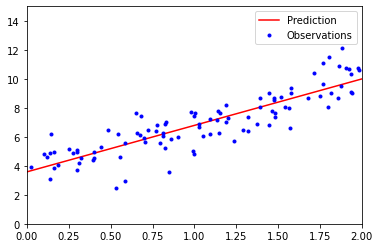

In [4]:
# plot the result
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.", label="Observations")
plt.legend()
plt.axis([0, 2, 0, 15])
plt.show()

### Solution by sklearn's LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.58416294]), array([[3.20404128]]))

In [6]:
lin_reg.predict(X_new)

array([[3.58416294],
       [9.9922455 ]])

### Drawback of solution by analytic methods

It's computationally expensive. In Big-O notations, calculating matrix multiplication of sizes $n+1$ is $O(n^{2.4})$ ~ $O(n^3)$

## Gradient Descent

**Important Parameter**: learning rate $\eta$

If $\eta$ is too small, it takes too long for the algorithm to converge.   
On the other hand, if it's too large, the algorithm may overshoot, in short, it bounces off arbitrarily.

### Batch Gradient Descent 

The gradient of cost function can be calculated using the formula

$\nabla_{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X\theta - y)$ 

In [7]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2, 1)

for i in range(n_iter):
    grad = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grad

In [8]:
theta

array([[3.58416294],
       [3.20404128]])

### Stochastic Gradient Descent

In [11]:
n_epochs = 100
t0, t1 = 5, 50
m = X_b.shape[0]

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # initialize parameters randomly

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[3.57514216],
       [3.22064351]])

### Mini-Batch Gradient Descent

However, due to the randomness that SGD leans on, SGD sometimes shows unexpected results because of its inherent unstability.

How can we deal with this problem?

One way is to use not a single, but bunch of data at once for gradient at each step.

It's simple. We randomly choose a subset of entire dataset and then calculate gradient, and update theta.

In [13]:
n_epochs = 100
t0, t1 = 5, 50
m = X_b.shape[0]

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # initialize parameters randomly

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = list(np.random.randint(m, size=10))    # randomly collect 10 samples from the dataset
        xi = X_b[random_idx]
        yi = y[random_idx]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[3.5985145 ],
       [3.19492012]])

## Polynomial Regression

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[-0.97351227] [-0.97351227  0.94772614]


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93988604]), array([[1.01786008, 0.49143164]]))

## Applying regulations on the models

Ridge, Lasso, and Elastic net --> Refer to books. They can be done by providing additional parameter to regressor